In [17]:
from numpy import *
import matplotlib.pylab as plt

# 用线性回归找到最佳拟合直线

In [18]:
def loadDataSet(fileName):                 
    """ 加载数据
        解析以tab键分隔的文件中的浮点数
    Returns：
        dataMat ：  feature 对应的数据集
        labelMat ： feature 对应的分类标签，即类别标签

    """
    # 获取样本特征的总数，不算最后的目标变量 
    numFeat = len(open(fileName).readline().split('\t')) - 1 
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr =[]
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2 
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量           
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [19]:
def standRegres(xArr,yArr):
    '''
    Description：
        线性回归
    Args:
        xArr ：输入的样本数据，包含每个样本数据的 feature
        yArr ：对应于输入数据的类别标签，也就是每个样本对应的目标变量
    Returns:
        ws：回归系数
    '''

    # mat()函数将xArr，yArr转换为矩阵 mat().T 代表的是对矩阵进行转置操作
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 矩阵乘法的条件是左矩阵的列数等于右矩阵的行数
    xTx = xMat.T*xMat
    # 因为要用到xTx的逆矩阵，所以事先需要确定计算得到的xTx是否可逆，条件是矩阵的行列式不为0
    # linalg.det() 函数是用来求得矩阵的行列式的，如果矩阵的行列式为0，则这个矩阵是不可逆的，就无法进行接下来的运算                   
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse" )
        return
    # 最小二乘法
    # http://www.apache.wiki/pages/viewpage.action?pageId=5505133
    # 书中的公式，求得w的最优解
    ws = xTx.I * (xMat.T*yMat)            
    return ws

In [20]:
xArr, yArr = loadDataSet('ex0.txt')
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [21]:
ws = standRegres(xArr, yArr)
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [22]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat*ws

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([xMat[:, 1].flatten()], yMat.T[:, 0].flatten().A[0]) 

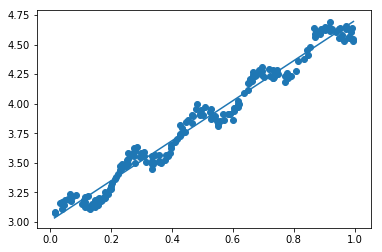

In [24]:
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat)
plt.show()

In [25]:
yHat = xMat * ws
corrcoef(yHat.T, yMat)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

# 局部加权线性回归

In [33]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    '''
        Description：
            局部加权线性回归，在待预测点附近的每个点赋予一定的权重，在子集上基于最小均方差来进行普通的回归。
        Args：
            testPoint：样本点
            xArr：样本的特征数据，即 feature
            yArr：每个样本对应的类别标签，即目标变量
            k:关于赋予权重矩阵的核的一个参数，与权重的衰减速率有关
        Returns:
            testPoint * ws：数据点与具有权重的系数相乘得到的预测点
        Notes:
            这其中会用到计算权重的公式，w = e^((x^((i))-x) / -2k^2)
            理解：x为某个预测点，x^((i))为样本点，样本点距离预测点越近，贡献的误差越大（权值越大），越远则贡献的误差越小（权值越小）。
            关于预测点的选取，在我的代码中取的是样本点。其中k是带宽参数，控制w（钟形函数）的宽窄程度，类似于高斯函数的标准差。
            算法思路：假设预测点取样本点中的第i个样本点（共m个样本点），遍历1到m个样本点（含第i个），算出每一个样本点与预测点的距离，
            也就可以计算出每个样本贡献误差的权值，可以看出w是一个有m个元素的向量（写成对角阵形式）。
    '''
    # mat() 函数是将array转换为矩阵的函数， mat().T 是转换为矩阵之后，再进行转置操作
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 获得xMat矩阵的行数
    m = shape(xMat)[0]
    # eye()返回一个对角线元素为1，其他元素为0的二维数组，创建权重矩阵weights，该矩阵为每个样本点初始化了一个权重                   
    weights = mat(eye((m)))
    for j in range(m):
        # testPoint 的形式是 一个行向量的形式
        # 计算 testPoint 与输入样本点之间的距离，然后下面计算出每个样本贡献误差的权值
        diffMat = testPoint - xMat[j,:]
        # k控制衰减的速度
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    # 根据矩阵乘法计算 xTx ，其中的 weights 矩阵是样本点对应的权重矩阵
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    # 计算出回归系数的一个估计
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [34]:
def lwlrTest(testArr,xArr,yArr,k=1.0):
    '''
        Description：
            测试局部加权线性回归，对数据集中每个点调用 lwlr() 函数
        Args：
            testArr：测试所用的所有样本点
            xArr：样本的特征数据，即 feature
            yArr：每个样本对应的类别标签，即目标变量
            k：控制核函数的衰减速率
        Returns：
            yHat：预测点的估计值
    '''
    # 得到样本点的总数
    m = shape(testArr)[0]
    # 构建一个全部都是 0 的 1 * m 的矩阵
    yHat = zeros(m)
    # 循环所有的数据点，并将lwlr运用于所有的数据点 
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    # 返回估计值
    return yHat

In [35]:
xArr, yArr = loadDataSet('ex0.txt')
yArr[0]

3.176513

In [ ]:
lwlr(xArr[0], xArr, yArr, 1.0)
